In [1]:
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
mpl.rcParams['figure.figsize'] = (9, 4)
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [3]:
def portfolio_returns(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns


def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [4]:
l = ["Food", 'Beer', 'Smoke', 'Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [5]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [6]:
weights = np.repeat(1/4, 4)
erk.portfolio_returns(weights, er[l])

0.19511097196038385

In [7]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

## 2 asset frontier

In [8]:
l = ["Games", "Fin"]

In [9]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [10]:
len(weights)

20

In [11]:
rets = [erk.portfolio_returns(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]

ef = pd.DataFrame({"R": rets, "Vol": vols})

In [12]:
ef

,R,Vol
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753
5,0.182540,0.057965
6,0.174374,0.057308
7,0.166207,0.056786
8,0.158041,0.056403
9,0.149875,0.056161


<AxesSubplot:xlabel='Vol', ylabel='R'>

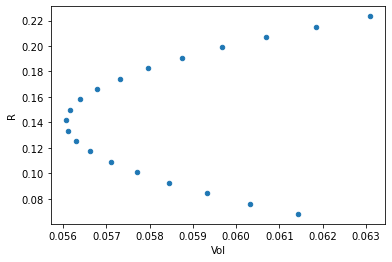

In [13]:
ef.plot.scatter(x="Vol", y="R")

In [14]:
def plot_ef2(n_points, er, cov, linestyle = ".-"):
    """
    Plots the 2-asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("Plot_ef2 can only plot 2-asset frontiers")

    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

    rets = [erk.portfolio_returns(w, er[l]) for w in weights]
    vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]

    # pack into df
    ef = pd.DataFrame({"Returns": rets, "Volatility": vols})

    # plot
    return ef.plot.line(x="Volatility", y="Returns", style = linestyle)

<AxesSubplot:xlabel='Volatility'>

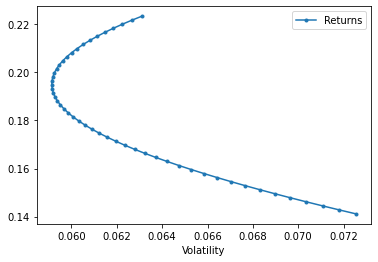

In [15]:
l = ["Fin","Beer"]
plot_ef2(50,er[l],cov.loc[l,l])